In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
mmf = pd.read_csv("money_market_fund.csv") #load File

In [4]:
mmf.head() #read first few rows

,ReportMonth,registrant_cik,registrant,series_name,series_id,series_category,class_name,class_id,investment_advisor
0,31-01-2025,742212,"NORTHWESTERN MUTUAL SERIES FUND, INC.",GOVERNMENT MONEY MARKET PORTFOLIO,S000000048,Government,Government Money Market Portfolio,C000000083,"Mason Street Advisors, LLC"
1,31-01-2025,796251,DREYFUS TREASURY &AMP; AGENCY CASH MANAGEMENT,DREYFUS TREASURY OBLIGATIONS CASH MANAGEMENT,S000000112,Government,Institutional Shares,C000000251,"BNY Mellon Investment Adviser, Inc."
2,31-01-2025,796251,DREYFUS TREASURY &AMP; AGENCY CASH MANAGEMENT,DREYFUS TREASURY OBLIGATIONS CASH MANAGEMENT,S000000112,Government,Investor Shares,C000000252,"BNY Mellon Investment Adviser, Inc."
3,31-01-2025,796251,DREYFUS TREASURY &AMP; AGENCY CASH MANAGEMENT,DREYFUS TREASURY OBLIGATIONS CASH MANAGEMENT,S000000112,Government,Administrative Shares,C000000253,"BNY Mellon Investment Adviser, Inc."
4,31-01-2025,796251,DREYFUS TREASURY &AMP; AGENCY CASH MANAGEMENT,DREYFUS TREASURY OBLIGATIONS CASH MANAGEMENT,S000000112,Government,Participant Shares,C000000254,"BNY Mellon Investment Adviser, Inc."


In [11]:
mmf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178 entries, 0 to 1177
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ReportMonth         1178 non-null   object
 1   registrant_cik      1178 non-null   int64 
 2   registrant          1178 non-null   object
 3   series_name         1178 non-null   object
 4   series_id           1178 non-null   object
 5   series_category     1178 non-null   object
 6   class_name          1178 non-null   object
 7   class_id            1178 non-null   object
 8   investment_advisor  1178 non-null   object
dtypes: int64(1), object(8)
memory usage: 83.0+ KB


In [12]:
mmf.isnull().sum() #check null values

ReportMonth           0
registrant_cik        0
registrant            0
series_name           0
series_id             0
series_category       0
class_name            0
class_id              0
investment_advisor    0
dtype: int64

In [26]:
mmf['ReportMonth'] = pd.to_datetime(mmf['ReportMonth']) # change data type

In [47]:
mmf['date'] = mmf['ReportMonth'].dt.date
funds_per_date = mmf.groupby('date')['registrant'].nunique()

In [48]:
mmf.head()

,ReportMonth,registrant_cik,registrant,series_name,series_id,series_category,class_name,class_id,investment_advisor,Year,date
0,2025-01-31,742212,"NORTHWESTERN MUTUAL SERIES FUND, INC.",GOVERNMENT MONEY MARKET PORTFOLIO,S000000048,Government,Government Money Market Portfolio,C000000083,"Mason Street Advisors, LLC",2025,2025-01-31
1,2025-01-31,796251,DREYFUS TREASURY &AMP; AGENCY CASH MANAGEMENT,DREYFUS TREASURY OBLIGATIONS CASH MANAGEMENT,S000000112,Government,Institutional Shares,C000000251,"BNY Mellon Investment Adviser, Inc.",2025,2025-01-31
2,2025-01-31,796251,DREYFUS TREASURY &AMP; AGENCY CASH MANAGEMENT,DREYFUS TREASURY OBLIGATIONS CASH MANAGEMENT,S000000112,Government,Investor Shares,C000000252,"BNY Mellon Investment Adviser, Inc.",2025,2025-01-31
3,2025-01-31,796251,DREYFUS TREASURY &AMP; AGENCY CASH MANAGEMENT,DREYFUS TREASURY OBLIGATIONS CASH MANAGEMENT,S000000112,Government,Administrative Shares,C000000253,"BNY Mellon Investment Adviser, Inc.",2025,2025-01-31
4,2025-01-31,796251,DREYFUS TREASURY &AMP; AGENCY CASH MANAGEMENT,DREYFUS TREASURY OBLIGATIONS CASH MANAGEMENT,S000000112,Government,Participant Shares,C000000254,"BNY Mellon Investment Adviser, Inc.",2025,2025-01-31


In [39]:
top_advisors = mmf['investment_advisor'].value_counts().head(10)

C:\Users\chand\AppData\Local\Temp\ipykernel_22372\3565450998.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_advisors.values, y=top_advisors.index, palette="coolwarm")


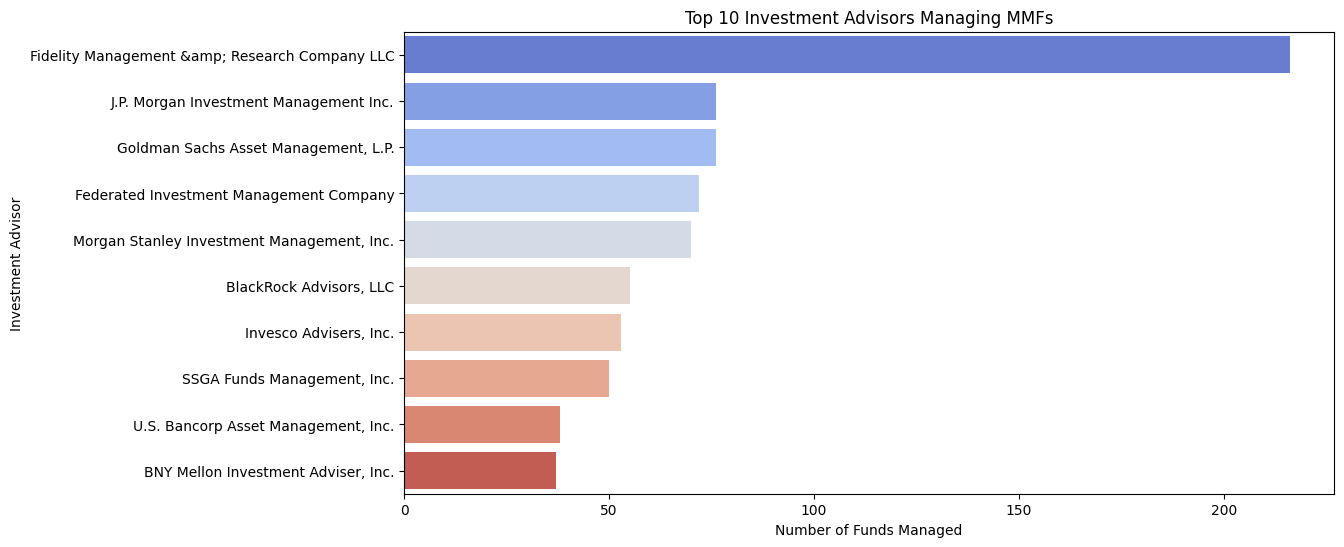

In [40]:
# Top 10 invester 
plt.figure(figsize=(12,6))
sns.barplot(x=top_advisors.values, y=top_advisors.index, palette="coolwarm")
plt.xlabel("Number of Funds Managed")
plt.ylabel("Investment Advisor")
plt.title("Top 10 Investment Advisors Managing MMFs")
plt.show()

In [42]:
series_category_count = mmf['series_category'].value_counts()

C:\Users\chand\AppData\Local\Temp\ipykernel_22372\4066082208.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=series_category_count.values, y=series_category_count.index, palette="viridis")


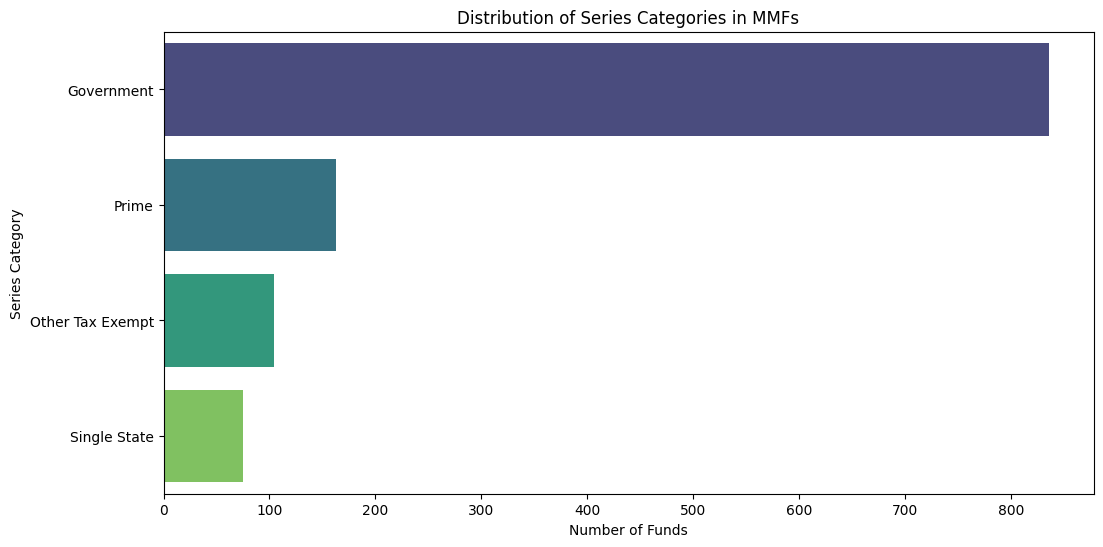

In [43]:
# Series Category
plt.figure(figsize=(12,6))
sns.barplot(x=series_category_count.values, y=series_category_count.index, palette="viridis")
plt.xlabel("Number of Funds")
plt.ylabel("Series Category")
plt.title("Distribution of Series Categories in MMFs")
plt.show()